# TITLE.EXE

__*Equipo 2*__

Cada equipo diseñará un clasificador de imágenes, las categorías que clasificará cada equipo son las siguientes:

Equipo #2 y #5: Clasificador de 5 alimentos diferentes (i.e. ensalada, atún, pasta, hamburguesa, pizza)

__1.- Recolección y procesamiento de datos__

__Web Scrapping__

In [12]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import re  
import ast
import numpy as np
import urllib
import cv2
import time
import os, re, os.path
#################################################################################################
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
################################################################################################

def clean_directory():
    mypath = "test/" + term
    for root, dirs, files in os.walk(mypath):
        for file in files:
            os.remove(os.path.join(root, file))
    mypath = "train/" + term
    for root, dirs, files in os.walk(mypath):
        for file in files:
            os.remove(os.path.join(root, file))
    mypath = "validation/" + term
    for root, dirs, files in os.walk(mypath):
        for file in files:
            os.remove(os.path.join(root, file))
            
def create_directories():
    if os.path.isdir('train/' + term) is False:
        os.makedirs('train/' + term)
        os.makedirs('validation/' + term)
        os.makedirs('test/' + term)

def downloadImage(url, filename):
    with urllib.request.urlopen(url) as resp:
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)

        # Save image file
        cv2.imwrite(filename, image)

#############################################################
while True:
    try:
        term = str(input("Which image to download?: "))

        if term == 'exit':
            break
        
        create_directories()
        clean_directory()

        #driver = webdriver.Chrome(executable_path=r'C:\webdriver\chromedriver.exe')
        driver = webdriver.Firefox(executable_path=r'C:\webdrivers\geckodriver.exe')
        driver.get("https://www.shutterstock.com/")
        element = driver.find_element_by_name("searchterm") # name = "searchterm": what was found in the inspector
        element.click() # selecting the searchterm element
        element.send_keys(term) # inserting the query
        element.send_keys(Keys.ENTER) # executing the search


        currentPage = 0
        maxPages = 3 # only 3 pages of the webpage are used to collect images.
        imageCount = 1

        while int(currentPage) < maxPages:

            time.sleep(5)

            iter=1
            while True:
                scrollHeight = driver.execute_script("return document.documentElement.scrollHeight")
                Height=250*iter
                driver.execute_script("window.scrollTo(0, " + str(Height) + ");")

                if Height > scrollHeight:
                    print('End of page')
                    break

                iter+=1

            body = driver.execute_script("return document.body")
            source = body.get_attribute('innerHTML')

            soup = BeautifulSoup(source, "html.parser")

            pageElement = soup.select("#content > div.s_f_ff6d0 > div > div.oc_ab_e5c9b.oc_ab_46972.b_Q_f0f29.oc_ab_6c502.b_Q_7113c.oc_ab_71c37.b_Q_dd576.oc_ab_4ae09.b_Q_045e8 > div.oc_ab_57b1b.b_Q_01b73 > main > div > div.o_n_9de35.o_n_0b924.z_l_3ec2a > div.z_l_3929f > div > div > div.o_input_theme_input.oc_Y_aba37.b_J_794a3.oc_ag_14e0f.b_aI_fd138.number-input > input")[0]
            currentPage = pageElement["value"]
            maxPages = 3
            print("currentPage -> ", currentPage)
            print("maxPages -> ", maxPages)

            results = soup.find("div", {"class": "z_g_d65b1"})
            for img in results.find_all("img"):
                try:
                    if img["src"] is not None:
                        print(imageCount, " -> ", img["src"])
                        if imageCount%10==0:
                            downloadImage(img["src"], "validation/" + term + "/ " + term + str(imageCount) + ".jpg")
                        elif imageCount%10==1 or imageCount%10==2:
                            downloadImage(img["src"], "test/" + term + "/ " + term + str(imageCount) + ".jpg")
                        else:
                            downloadImage(img["src"], "train/" + term + "/ " + term + str(imageCount) + ".jpg")
                    imageCount += 1
                except: 
                    KeyError
            # Next page button element
            driver.execute_script("window.scrollTo(0, 0);")
            button = driver.find_element_by_css_selector("#content > div.s_f_ff6d0 > div > div.oc_ab_e5c9b.oc_ab_46972.b_Q_f0f29.oc_ab_6c502.b_Q_7113c.oc_ab_71c37.b_Q_dd576.oc_ab_4ae09.b_Q_045e8 > div.oc_ab_57b1b.b_Q_01b73 > main > div > div.o_n_9de35.o_n_0b924.z_l_3ec2a > div.z_l_3929f > div > div > a:nth-child(3)")
            button.click()

        driver.close()
        
    except:
        KeyError

Which image to download?: pizza
End of page
currentPage ->  1
maxPages ->  3
1  ->  https://image.shutterstock.com/image-photo/concept-promotional-flyer-poster-restaurants-260nw-1060535249.jpg
2  ->  https://image.shutterstock.com/image-photo/pizza-salami-cheese-on-box-260nw-1923205127.jpg
3  ->  https://image.shutterstock.com/image-vector/people-having-dinner-together-sharing-260nw-1918835594.jpg
4  ->  https://image.shutterstock.com/image-photo/tasty-pepperoni-pizza-cooking-ingredients-260nw-1253661532.jpg
5  ->  https://image.shutterstock.com/image-vector/pizza-italian-fast-food-pepperoni-260nw-1922916629.jpg
6  ->  https://image.shutterstock.com/image-vector/fast-food-burger-pizza-french-260nw-1923004124.jpg
7  ->  https://image.shutterstock.com/image-photo/banner-heart-shaped-pizza-place-260nw-1888897186.jpg
8  ->  https://image.shutterstock.com/image-vector/smartphone-digital-food-delivery-applicationpizza-260nw-1891560646.jpg
9  ->  https://image.shutterstock.com/image-photo/con

77  ->  https://image.shutterstock.com/image-photo/delicious-fresh-pizza-served-on-260nw-136631573.jpg
78  ->  https://image.shutterstock.com/image-photo/italian-pizza-restaurant-menu-classic-260nw-735549616.jpg
79  ->  https://image.shutterstock.com/image-photo/pizza-margherita-on-black-stone-260nw-658408219.jpg
80  ->  https://image.shutterstock.com/image-photo/girl-hands-keep-rolling-pin-260nw-723271465.jpg
81  ->  https://image.shutterstock.com/image-vector/pepperoni-cheese-pizza-banner-ads-260nw-1519934609.jpg
82  ->  https://image.shutterstock.com/image-photo/pizza-slice-top-view-isolated-260nw-675329623.jpg
83  ->  https://image.shutterstock.com/image-photo/baked-pizza-salami-prosciutto-chicken-260nw-1711942921.jpg
84  ->  https://image.shutterstock.com/image-photo/tasty-pizza-on-table-against-260nw-1009486159.jpg
85  ->  https://image.shutterstock.com/image-photo/flat-lay-italian-pizza-on-260nw-701420866.jpg
86  ->  https://image.shutterstock.com/image-photo/tasty-margherita-it

155  ->  https://image.shutterstock.com/image-photo/close-multiethnic-young-people-gather-260nw-1463233046.jpg
156  ->  https://image.shutterstock.com/image-photo/pizza-cooks-hand-dough-flour-260nw-689644546.jpg
157  ->  https://image.shutterstock.com/image-photo/concept-flying-ingredients-pizza-dough-260nw-614638862.jpg
158  ->  https://image.shutterstock.com/image-photo/food-collage-various-types-pizza-260nw-1289641396.jpg
159  ->  https://image.shutterstock.com/image-photo/hot-pizza-slice-dripping-melted-260nw-512651860.jpg
160  ->  https://image.shutterstock.com/image-photo/three-young-delighted-men-eating-260nw-1086914132.jpg
161  ->  https://image.shutterstock.com/image-vector/pizza-food-menu-restaurant-cafe-260nw-761372659.jpg
162  ->  https://image.shutterstock.com/image-vector/pizza-flat-icon-isolated-on-260nw-792335464.jpg
163  ->  https://image.shutterstock.com/image-photo/pizza-background-set-delicious-homemade-260nw-1936522372.jpg
164  ->  https://image.shutterstock.com/im

231  ->  https://image.shutterstock.com/image-photo/skilled-chef-preparing-dough-pizza-260nw-1086728951.jpg
232  ->  https://image.shutterstock.com/image-vector/hand-drawn-fast-food-logos-260nw-1511976623.jpg
233  ->  https://image.shutterstock.com/image-vector/vector-pizza-slice-drawing-hand-260nw-370077752.jpg
234  ->  https://image.shutterstock.com/image-vector/pizza-on-shovel-baked-wood-260nw-587122028.jpg
235  ->  https://image.shutterstock.com/image-photo/slice-delicious-pizza-margherita-isolated-260nw-1686425035.jpg
236  ->  https://image.shutterstock.com/image-photo/happy-new-year-2021-concept-260nw-1878669400.jpg
237  ->  https://image.shutterstock.com/image-vector/pizza-seamless-pattern-background-doodle-260nw-753533902.jpg
238  ->  https://image.shutterstock.com/image-photo/pizza-on-dark-background-260nw-1662017566.jpg
239  ->  https://image.shutterstock.com/image-vector/blank-white-black-pizza-cardboard-260nw-760659364.jpg
240  ->  https://image.shutterstock.com/image-photo

308  ->  https://image.shutterstock.com/image-vector/pizza-hand-written-lettering-logo-260nw-542294620.jpg
309  ->  https://image.shutterstock.com/image-photo/pizza-260nw-596137496.jpg
310  ->  https://image.shutterstock.com/image-vector/pizza-design-template-260nw-126244685.jpg
311  ->  https://image.shutterstock.com/image-photo/hot-margherita-pizza-baked-oven-260nw-1126302662.jpg
312  ->  https://image.shutterstock.com/image-photo/portrait-attractive-couple-man-woman-260nw-1440745253.jpg
313  ->  https://image.shutterstock.com/image-photo/pizza-pepperoni-mozzarella-cheese-salami-260nw-794068156.jpg
314  ->  https://image.shutterstock.com/image-photo/pizza-prosciutto-cheese-top-view-260nw-1568319088.jpg
315  ->  https://image.shutterstock.com/image-photo/salami-basil-pizza-on-kitchen-260nw-1697874889.jpg
316  ->  https://image.shutterstock.com/image-photo/appetizing-gingerbread-pizza-italian-cuisine-260nw-1691188162.jpg
Which image to download?: salad
End of page
currentPage ->  1
max

69  ->  https://image.shutterstock.com/image-photo/fresh-salad-fruits-greens-on-260nw-253956637.jpg
70  ->  https://image.shutterstock.com/image-photo/healthy-organic-chicken-caesar-salad-260nw-502679449.jpg
71  ->  https://image.shutterstock.com/image-photo/caesar-salad-paper-bowl-take-260nw-1178418982.jpg
72  ->  https://image.shutterstock.com/image-photo/salad-mix-rucola-frisee-radicchio-260nw-133732169.jpg
73  ->  https://image.shutterstock.com/image-photo/green-vegan-breakfast-meal-bowl-260nw-648899398.jpg
74  ->  https://image.shutterstock.com/image-photo/fresh-green-salad-spinacharugularomaine-lettuce-260nw-174457319.jpg
75  ->  https://image.shutterstock.com/image-photo/homemade-autumn-apple-cranberry-salad-260nw-739120534.jpg
76  ->  https://image.shutterstock.com/image-photo/salad-chicken-breast-zucchini-cherry-260nw-295931141.jpg
77  ->  https://image.shutterstock.com/image-vector/salad-solid-icon-food-dish-260nw-1393433558.jpg
78  ->  https://image.shutterstock.com/image-ve

146  ->  https://image.shutterstock.com/image-photo/top-view-salad-bar-assortment-260nw-776470294.jpg
147  ->  https://image.shutterstock.com/image-vector/salad-bowl-explosion-red-chili-260nw-1729247920.jpg
148  ->  https://image.shutterstock.com/image-photo/fresh-quinoa-tabbouleh-salad-tomatoes-260nw-1402877300.jpg
149  ->  https://image.shutterstock.com/image-vector/fast-food-hand-drawn-cup-260nw-407361967.jpg
150  ->  https://image.shutterstock.com/image-vector/salad-icons-set-vector-illustration-260nw-1841639899.jpg
151  ->  https://image.shutterstock.com/image-photo/salad-box-cover-top-view-260nw-769443250.jpg
152  ->  https://image.shutterstock.com/image-vector/cooking-infographics-lets-make-salad-260nw-249237043.jpg
153  ->  https://image.shutterstock.com/image-vector/vector-green-salad-icon-includes-260nw-1221270799.jpg
154  ->  https://image.shutterstock.com/image-photo/healthy-chicken-meal-grilled-vegetables-260nw-1686659068.jpg
155  ->  https://image.shutterstock.com/image-p

225  ->  https://image.shutterstock.com/image-photo/spring-salad-red-onion-cucumber-260nw-1916510750.jpg
226  ->  https://image.shutterstock.com/image-vector/vector-logo-template-salad-bar-260nw-605426243.jpg
227  ->  https://image.shutterstock.com/image-photo/vegetable-salad-isolated-on-white-260nw-80236867.jpg
228  ->  https://image.shutterstock.com/image-vector/lettering-salad-vegetable-ornament-260nw-660011833.jpg
229  ->  https://image.shutterstock.com/image-photo/avocado-tomato-arugula-salad-healthy-260nw-519491032.jpg
230  ->  https://image.shutterstock.com/image-vector/hand-drawn-vector-illustration-fresh-260nw-570691558.jpg
231  ->  https://image.shutterstock.com/image-photo/beautiful-fit-woman-eating-healthy-260nw-600370532.jpg
232  ->  https://image.shutterstock.com/image-vector/bowl-salad-on-white-background-260nw-672538039.jpg
233  ->  https://image.shutterstock.com/image-photo/spring-vegan-salad-spinach-cherry-260nw-1655811334.jpg
234  ->  https://image.shutterstock.com/i

303  ->  https://image.shutterstock.com/image-photo/bowl-healthy-fresh-fruit-salad-260nw-264191045.jpg
304  ->  https://image.shutterstock.com/image-vector/mix-fresh-salad-different-vegetables-260nw-1646737567.jpg
305  ->  https://image.shutterstock.com/image-vector/salad-bowl-green-peppers-tomato-260nw-1298512465.jpg
306  ->  https://image.shutterstock.com/image-photo/colorful-fruit-salad-jar-on-260nw-333913928.jpg
307  ->  https://image.shutterstock.com/image-photo/healthy-vegetarian-salad-roasted-pumpkin-260nw-1134901604.jpg
308  ->  https://image.shutterstock.com/image-vector/flat-vector-set-vegetable-fruit-260nw-1110857888.jpg
309  ->  https://image.shutterstock.com/image-photo/white-plate-fresh-greek-salad-260nw-1938109168.jpg
310  ->  https://image.shutterstock.com/image-photo/colorful-fresh-vegetable-salad-mozzarella-260nw-407134726.jpg
311  ->  https://image.shutterstock.com/image-photo/healthy-vegan-avocado-beet-salad-260nw-1299202105.jpg
312  ->  https://image.shutterstock.c

66  ->  https://image.shutterstock.com/image-vector/set-salmon-slices-tuna-meat-260nw-751193665.jpg
67  ->  https://image.shutterstock.com/image-photo/pasta-spaggeti-tuna-tomato-sauce-260nw-1728266257.jpg
68  ->  https://image.shutterstock.com/image-photo/tuna-canned-fish-isolated-on-260nw-261236537.jpg
69  ->  https://image.shutterstock.com/image-photo/tuna-salad-sandwiches-eggs-cucumbers-260nw-787699585.jpg
70  ->  https://image.shutterstock.com/image-photo/tuna-sweetcorn-healthy-pasta-salad-260nw-1509805001.jpg
71  ->  https://image.shutterstock.com/image-photo/close-still-life-two-fried-260nw-421676350.jpg
72  ->  https://image.shutterstock.com/image-photo/tuna-canned-fish-isolated-on-260nw-272373911.jpg
73  ->  https://image.shutterstock.com/image-photo/bowl-canned-tuna-on-light-260nw-1495453556.jpg
74  ->  https://image.shutterstock.com/image-vector/round-shaped-tuna-fillets-vector-260nw-607563062.jpg
75  ->  https://image.shutterstock.com/image-illustration/black-fin-tuna-realis

146  ->  https://image.shutterstock.com/image-photo/crepes-tuna-260nw-672752890.jpg
147  ->  https://image.shutterstock.com/image-vector/fish-sketch-collection-hand-drawn-260nw-1485305258.jpg
148  ->  https://image.shutterstock.com/image-photo/salad-tuna-260nw-85061470.jpg
149  ->  https://image.shutterstock.com/image-vector/seafood-set-crab-squid-tuna-260nw-524325067.jpg
150  ->  https://image.shutterstock.com/image-photo/pasta-tuna-cherry-tomatoes-black-260nw-111436208.jpg
151  ->  https://image.shutterstock.com/image-photo/prickly-pear-cactus-close-fruit-260nw-211379527.jpg
152  ->  https://image.shutterstock.com/image-photo/typical-spanish-empanadas-bowl-isolated-260nw-675195424.jpg
153  ->  https://image.shutterstock.com/image-photo/fresh-tuna-fillet-steak-sea-260nw-1048601108.jpg
154  ->  https://image.shutterstock.com/image-photo/prickly-pear-cut-half-arranged-260nw-1072310009.jpg
155  ->  https://image.shutterstock.com/image-photo/tuna-tortilla-avocado-fresh-salsa-260nw-6619701

226  ->  https://image.shutterstock.com/image-photo/delicious-tuna-sandwich-served-lettuce-260nw-1109946683.jpg
227  ->  https://image.shutterstock.com/image-photo/pasta-tuna-cherry-tomatoes-black-260nw-92515717.jpg
228  ->  https://image.shutterstock.com/image-vector/tuna-fish-260nw-492615658.jpg
229  ->  https://image.shutterstock.com/image-photo/close-still-life-two-fried-260nw-421671313.jpg
230  ->  https://image.shutterstock.com/image-photo/sandwich-tuna-on-white-background-260nw-216011470.jpg
231  ->  https://image.shutterstock.com/image-photo/salad-vegetables-tuna-on-rustic-260nw-704636941.jpg
232  ->  https://image.shutterstock.com/image-photo/tuna-fillet-260nw-430616599.jpg
233  ->  https://image.shutterstock.com/image-photo/delicious-tuna-sandwich-served-lettuce-260nw-1109946686.jpg
234  ->  https://image.shutterstock.com/image-photo/delicious-tuna-sandwich-served-lettuce-260nw-724815316.jpg
235  ->  https://image.shutterstock.com/image-vector/albacore-tuna-fish-vector-illust

2  ->  https://image.shutterstock.com/image-photo/closeup-home-made-tasty-burger-260nw-1457602919.jpg
3  ->  https://image.shutterstock.com/image-vector/hand-drawn-vector-bread-burger-260nw-1930435454.jpg
4  ->  https://image.shutterstock.com/image-photo/classic-cheeseburger-beef-patty-pickles-260nw-1361627531.jpg
5  ->  https://image.shutterstock.com/image-photo/homemade-burger-grilled-ribs-vegetables-260nw-1922203067.jpg
6  ->  https://image.shutterstock.com/image-photo/home-made-hamburger-lettuce-cheese-260nw-361890518.jpg
7  ->  https://image.shutterstock.com/image-photo/juicy-appetizing-burger-tomatoes-lettuce-260nw-1918859120.jpg
8  ->  https://image.shutterstock.com/image-photo/cheeseburger-beeftomato-lettuce-onion-on-260nw-1918950455.jpg
9  ->  https://image.shutterstock.com/image-photo/classic-style-double-cheeseburger-two-260nw-1915451770.jpg
10  ->  https://image.shutterstock.com/image-photo/hamburger-fried-potatoes-on-wooden-260nw-1399168025.jpg
11  ->  https://image.shutte

80  ->  https://image.shutterstock.com/image-vector/hamburger-soda-takeaway-fast-food-260nw-1303381129.jpg
81  ->  https://image.shutterstock.com/image-photo/two-hamburgers-beef-burger-cutlet-260nw-525569071.jpg
82  ->  https://image.shutterstock.com/image-photo/burger-full-face-vegetables-spices-260nw-413484853.jpg
83  ->  https://image.shutterstock.com/image-photo/delicious-burger-floating-ingredients-on-260nw-395542927.jpg
84  ->  https://image.shutterstock.com/image-photo/home-made-tasty-burger-bacon-260nw-1723773265.jpg
85  ->  https://image.shutterstock.com/image-photo/freshly-grilled-burger-meat-isolated-260nw-1138086395.jpg
86  ->  https://image.shutterstock.com/image-photo/one-big-tall-classic-hamburger-260nw-1697637877.jpg
87  ->  https://image.shutterstock.com/image-vector/vector-drawing-hamburger-cheese-tomatoes-260nw-422290648.jpg
88  ->  https://image.shutterstock.com/image-vector/hamburger-vector-logo-template-vintage-260nw-1525405499.jpg
89  ->  https://image.shuttersto

156  ->  https://image.shutterstock.com/image-vector/chalkboard-fastfood-ads-hamburger-french-260nw-300377489.jpg
157  ->  https://image.shutterstock.com/image-photo/two-homemade-grilled-hamburgers-on-260nw-137819186.jpg
158  ->  https://image.shutterstock.com/image-vector/big-burger-hamburger-hand-drawn-260nw-768237886.jpg
159  ->  https://image.shutterstock.com/image-photo/double-cheeseburger-lettuce-tomato-melted-260nw-1732407538.jpg
160  ->  https://image.shutterstock.com/image-vector/fast-food-set-cartoon-vector-260nw-316361120.jpg
161  ->  https://image.shutterstock.com/image-vector/fastfood-related-line-icon-set-260nw-1386464780.jpg
162  ->  https://image.shutterstock.com/image-photo/empty-hands-showing-gesture-holding-260nw-1438745132.jpg
163  ->  https://image.shutterstock.com/image-photo/two-hamburger-buns-sesame-isolated-260nw-1028480995.jpg
164  ->  https://image.shutterstock.com/image-vector/engraving-logo-burger-silhouette-modern-260nw-1470573311.jpg
165  ->  https://imag

232  ->  https://image.shutterstock.com/image-photo/closeup-home-made-burgers-fire-260nw-367962215.jpg
233  ->  https://image.shutterstock.com/image-photo/heart-shaped-hamburger-love-burger-260nw-1048777202.jpg
234  ->  https://image.shutterstock.com/image-photo/burger-260nw-360983039.jpg
235  ->  https://image.shutterstock.com/image-photo/hamburger-260nw-569980483.jpg
236  ->  https://image.shutterstock.com/image-photo/woman-eating-sandwich-happy-girl-260nw-1044784642.jpg
237  ->  https://image.shutterstock.com/image-photo/juicy-barbecued-hamburger-grill-marks-260nw-273075128.jpg
238  ->  https://image.shutterstock.com/image-photo/tasty-hot-dogs-cooking-on-260nw-400438009.jpg
239  ->  https://image.shutterstock.com/image-vector/vector-hamburger-clip-art-illustration-260nw-1121267870.jpg
240  ->  https://image.shutterstock.com/image-photo/homemade-grilled-hamburger-on-plate-260nw-135216374.jpg
241  ->  https://image.shutterstock.com/image-photo/closeup-burger-two-cutlets-cheese-260nw-1

309  ->  https://image.shutterstock.com/image-photo/closeup-home-made-tasty-burgers-260nw-1457602913.jpg
310  ->  https://image.shutterstock.com/image-vector/sesame-seeds-on-fresh-yummy-260nw-419486134.jpg
311  ->  https://image.shutterstock.com/image-vector/fast-food-dishes-set-ketchup-260nw-1497332267.jpg
312  ->  https://image.shutterstock.com/image-photo/meat-shawarma-bun-lettuce-tomato-260nw-1660325515.jpg
313  ->  https://image.shutterstock.com/image-vector/vector-seamless-pattern-hamburger-can-260nw-1195333897.jpg
314  ->  https://image.shutterstock.com/image-photo/hamburger-beef-cheese-vegetables-on-260nw-790132855.jpg
Which image to download?: pasta
End of page
currentPage ->  1
maxPages ->  3
1  ->  https://image.shutterstock.com/image-photo/tasty-appetizing-classic-italian-spaghetti-260nw-1119580967.jpg
2  ->  https://image.shutterstock.com/image-photo/spaghetti-amatriciana-sauce-dish-on-260nw-421827745.jpg
3  ->  https://image.shutterstock.com/image-photo/pasta-cherry-tomat

73  ->  https://image.shutterstock.com/image-photo/heaped-plate-delicious-italian-spaghetti-260nw-631925096.jpg
74  ->  https://image.shutterstock.com/image-photo/fettuccine-italian-pasta-isolated-on-260nw-586987238.jpg
75  ->  https://image.shutterstock.com/image-photo/italian-food-on-dark-background-260nw-1781494175.jpg
76  ->  https://image.shutterstock.com/image-photo/pasta-spaghetti-pesto-sauce-fresh-260nw-1083871700.jpg
77  ->  https://image.shutterstock.com/image-vector/pasta-italian-macaroni-food-package-260nw-1518969929.jpg
78  ->  https://image.shutterstock.com/image-photo/italian-style-pasta-dinner-spaghetti-260nw-631737890.jpg
79  ->  https://image.shutterstock.com/image-photo/fettuccine-spaghetti-ingredients-cooking-pasta-260nw-445313647.jpg
80  ->  https://image.shutterstock.com/image-photo/variety-types-shapes-italian-pasta-260nw-1208870566.jpg
81  ->  https://image.shutterstock.com/image-vector/set-pasta-vector-icons-260nw-340105064.jpg
82  ->  https://image.shutterstoc

149  ->  https://image.shutterstock.com/image-photo/tasty-appetizing-pasta-served-tomato-260nw-1134347027.jpg
150  ->  https://image.shutterstock.com/image-photo/traditional-italian-dish-spaghetti-carbonara-260nw-1012639222.jpg
151  ->  https://image.shutterstock.com/image-photo/sky-grass-background-fresh-green-260nw-185725829.jpg
152  ->  https://image.shutterstock.com/image-vector/pasta-fork-basil-sauce-spaghetti-260nw-1097291726.jpg
153  ->  https://image.shutterstock.com/image-vector/transparent-package-penne-pasta-isolated-260nw-1730332738.jpg
154  ->  https://image.shutterstock.com/image-photo/spaghetti-carbonara-onion-mushroom-cream-260nw-1388458958.jpg
155  ->  https://image.shutterstock.com/image-photo/homemade-pasta-fried-bacon-260nw-1399203434.jpg
156  ->  https://image.shutterstock.com/image-photo/pasta-salad-cherry-tomatoes-broccoli-260nw-268750334.jpg
157  ->  https://image.shutterstock.com/image-vector/vector-icon-logo-italian-pasta-260nw-1247553871.jpg
158  ->  https://

226  ->  https://image.shutterstock.com/image-vector/vector-set-logo-design-templates-260nw-1055652563.jpg
227  ->  https://image.shutterstock.com/image-vector/pasta-background-realistic-italian-cuisine-260nw-1498966469.jpg
228  ->  https://image.shutterstock.com/image-photo/chef-hands-preparing-delicious-cold-260nw-418881994.jpg
229  ->  https://image.shutterstock.com/image-photo/classic-homemade-carbonara-pasta-pancetta-260nw-1315460417.jpg
230  ->  https://image.shutterstock.com/image-photo/fork-tasty-pasta-basil-on-260nw-536640898.jpg
231  ->  https://image.shutterstock.com/image-vector/list-pasta-different-types-shapes-260nw-411952687.jpg
232  ->  https://image.shutterstock.com/image-photo/background-perspective-green-grass-nature-260nw-1713546973.jpg
233  ->  https://image.shutterstock.com/image-vector/poster-lettering-la-vita-pasta-260nw-1308364810.jpg
234  ->  https://image.shutterstock.com/image-photo/spaghetti-fresh-tomato-sauce-mozzarella-260nw-1034719102.jpg
235  ->  https:

302  ->  https://image.shutterstock.com/image-photo/pasta-dish-red-sauce-cheese-260nw-1693679662.jpg
303  ->  https://image.shutterstock.com/image-vector/pasta-dish-italian-cuisine-spaghetti-260nw-1653435655.jpg
304  ->  https://image.shutterstock.com/image-vector/top-view-countryside-forest-grass-260nw-1018152745.jpg
305  ->  https://image.shutterstock.com/image-illustration/idyllic-seamless-grass-texture-260nw-177589586.jpg
306  ->  https://image.shutterstock.com/image-vector/pasta-collection-set-different-types-260nw-786202162.jpg
307  ->  https://image.shutterstock.com/image-photo/pasta-penne-bolognese-sauce-parmesan-260nw-133563188.jpg
308  ->  https://image.shutterstock.com/image-vector/spaghetti-pasta-line-icon-260nw-1040005138.jpg
309  ->  https://image.shutterstock.com/image-photo/pasta-salad-tomato-broccoli-black-260nw-404461990.jpg
310  ->  https://image.shutterstock.com/image-vector/green-grass-borders-set-background-260nw-1192533127.jpg
311  ->  https://image.shutterstock.

__Data Visualization__

In [29]:

import csv
import pandas as pd
import re  
import ast
import numpy as np
import urllib
import cv2
import time
import os, re, os.path
#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [8]:
# Likely-pointers to know the path of the 3 main created folders
train_path = 'train/'
valid_path = 'validation/'
test_path = 'test/'

In [10]:
hamburger_Set = [train_path+'hamburger',valid_path+'hamburger',test_path+'hamburger']
pasta_Set = [train_path+'pasta',valid_path+'pasta',test_path+'pasta']
pizza_Set = [train_path+'pizza',valid_path+'pizza',test_path+'pizza']
salad_Set = [train_path+'salad',valid_path+'salad',test_path+'salad']
tuna_Set = [train_path+'tuna',valid_path+'tuna',test_path+'tuna']
general_Set = [hamburger_Set,pasta_Set,pizza_Set,salad_Set,tuna_Set]

data=[]

for j in general_Set:
    for i in j:
        totalFiles = 0
        totalDir = 0
        for base, dirs, files in os.walk(i):
            print('Searching in : ',base)
            for directories in dirs:
                totalDir += 1
            for Files in files:
                totalFiles += 1
        total=totalDir+totalFiles
        data.append(total)
        print('Total:',(total))
        print(data)

Searching in :  train/hamburger
Total: 219
[219]
Searching in :  validation/hamburger
Total: 31
[219, 31]
Searching in :  test/hamburger
Total: 64
[219, 31, 64]
Searching in :  train/pasta
Total: 219
[219, 31, 64, 219]
Searching in :  validation/pasta
Total: 31
[219, 31, 64, 219, 31]
Searching in :  test/pasta
Total: 64
[219, 31, 64, 219, 31, 64]
Searching in :  train/pizza
Total: 221
[219, 31, 64, 219, 31, 64, 221]
Searching in :  validation/pizza
Total: 31
[219, 31, 64, 219, 31, 64, 221, 31]
Searching in :  test/pizza
Total: 64
[219, 31, 64, 219, 31, 64, 221, 31, 64]
Searching in :  train/salad
Total: 222
[219, 31, 64, 219, 31, 64, 221, 31, 64, 222]
Searching in :  validation/salad
Total: 31
[219, 31, 64, 219, 31, 64, 221, 31, 64, 222, 31]
Searching in :  test/salad
Total: 64
[219, 31, 64, 219, 31, 64, 221, 31, 64, 222, 31, 64]
Searching in :  train/tuna
Total: 212
[219, 31, 64, 219, 31, 64, 221, 31, 64, 222, 31, 64, 212]
Searching in :  validation/tuna
Total: 30
[219, 31, 64, 219, 3

In [11]:
data

[219, 31, 64, 219, 31, 64, 221, 31, 64, 222, 31, 64, 212, 30, 62]

In [12]:
labels = ["HAMBURGER_TRAIN","HAMBURGER_TEST","HAMBURGER_VALID",
         "PASTA_TRAIN","PASTA_TEST","PASTA_VALID",
         "PIZZA_TRAIN","PIZZA_TEST","PIZZA_VALID",
         "SALAD_TRAIN","SALAD_TEST","SALAD_VALID",
         "TUNA_TRAIN","TUNA_TEST","TUNA_VALID"
         ]

No handles with labels found to put in legend.


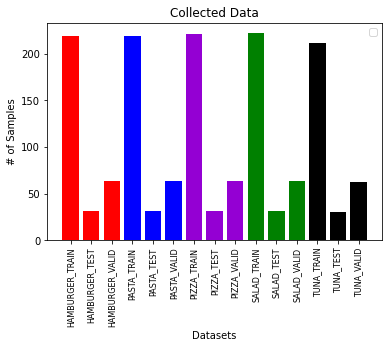

In [13]:
xpos = np.arange(len(labels))
plt.xticks(xpos,labels)
plt.xticks(fontsize=8, rotation=90)
plt.ylabel("# of Samples")
plt.title("Collected Data")
colors = ['r','r','r','b','b','b','darkviolet','darkviolet','darkviolet','g','g','g','k','k','k']
plt.bar(xpos,data,color=colors)
plt.xlabel("Datasets")
plt.legend()
plt.show()

__Data Augmentation and Processing__

 pizza35.jpg


(-0.5, 389.5, 279.5, -0.5)

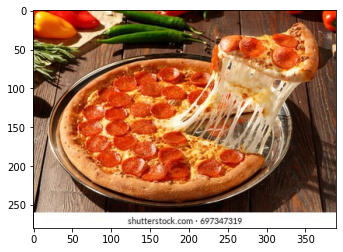

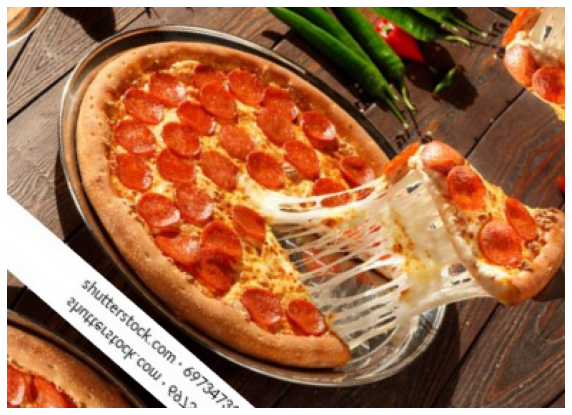

In [14]:
#Data augmentation usando una rotacion y una inversión aleatoria
data_augmentation = tf.keras.Sequential([
     keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     keras.layers.experimental.preprocessing.RandomRotation(0.2)])
chosen_image = random.choice(os.listdir('train/pizza'))
image_path = 'train/pizza/' + chosen_image
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])
print(chosen_image)
plt.figure(figsize=(10, 10))
augmented_image = data_augmentation(image)
plt.imshow(augmented_image[0])
plt.axis("off")



In [15]:
#Se crean n nuevas imagenes de cada imagen
#numero de imagenes nuevas
n=1
com=["pasta","pizza","salad","tuna","hamburger"]
for i in com:
    path='train/'+i
    Files=os.listdir(path)
    for files in Files:
        image_path =path+ '/' + files
        image = np.expand_dims(plt.imread(image_path),0)
        print(files)
        for y in list(range(n)):
            augmented_image = data_augmentation(image)
            plt.imshow(augmented_image[0])
            plt.axis("off")
            plt.savefig(path+ '/' + files[:-4]+"a_"+str(y)+".jpg")

 pasta103.jpg
 pasta104.jpg
 pasta105.jpg
 pasta106.jpg
 pasta107.jpg
 pasta108.jpg
 pasta109.jpg
 pasta113.jpg
 pasta114.jpg
 pasta115.jpg
 pasta116.jpg
 pasta117.jpg
 pasta118.jpg
 pasta119.jpg
 pasta123.jpg
 pasta124.jpg
 pasta125.jpg
 pasta126.jpg
 pasta127.jpg
 pasta128.jpg
 pasta129.jpg
 pasta13.jpg
 pasta133.jpg
 pasta134.jpg
 pasta135.jpg
 pasta136.jpg
 pasta137.jpg
 pasta138.jpg
 pasta139.jpg
 pasta14.jpg
 pasta143.jpg
 pasta144.jpg
 pasta145.jpg
 pasta146.jpg
 pasta147.jpg
 pasta148.jpg
 pasta149.jpg
 pasta15.jpg
 pasta153.jpg
 pasta154.jpg
 pasta155.jpg
 pasta156.jpg
 pasta157.jpg
 pasta158.jpg
 pasta159.jpg
 pasta16.jpg
 pasta163.jpg
 pasta164.jpg
 pasta165.jpg
 pasta166.jpg
 pasta167.jpg
 pasta168.jpg
 pasta169.jpg
 pasta17.jpg
 pasta173.jpg
 pasta174.jpg
 pasta175.jpg
 pasta176.jpg
 pasta177.jpg
 pasta178.jpg
 pasta179.jpg
 pasta18.jpg
 pasta183.jpg
 pasta184.jpg
 pasta185.jpg
 pasta186.jpg
 pasta187.jpg
 pasta188.jpg
 pasta189.jpg
 pasta19.jpg
 pasta193.jpg
 pasta194.jpg

KeyboardInterrupt: 

In [ ]:
#Creación del Modelo VGG16

In [16]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [17]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False

model.add(Dense(units=5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
train_path = './train'
valid_path = './validation'
test_path = './test'

classes=['hamburger','pasta','pizza','salad','tuna']

In [23]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=classes, batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=classes, batch_size=10)
    
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=classes, batch_size=10, shuffle=False)

Found 1329 images belonging to 5 classes.
Found 154 images belonging to 5 classes.
Found 318 images belonging to 5 classes.


In [24]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
133/133 - 20s - loss: 1.4264 - accuracy: 0.5094 - val_loss: 1.2049 - val_accuracy: 0.5260
Epoch 2/5
133/133 - 10s - loss: 0.8310 - accuracy: 0.7073 - val_loss: 0.9876 - val_accuracy: 0.6558
Epoch 3/5
133/133 - 10s - loss: 0.6382 - accuracy: 0.7713 - val_loss: 0.9339 - val_accuracy: 0.6623
Epoch 4/5
133/133 - 10s - loss: 0.5267 - accuracy: 0.8217 - val_loss: 0.8601 - val_accuracy: 0.6948
Epoch 5/5
133/133 - 10s - loss: 0.4549 - accuracy: 0.8457 - val_loss: 0.8225 - val_accuracy: 0.7273


In [25]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
np.round(predictions)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[48  6  3  2  5]
 [ 2 48  2  7  5]
 [ 3 10 43  4  4]
 [ 0 10  0 47  7]
 [ 1  9  5 11 36]]


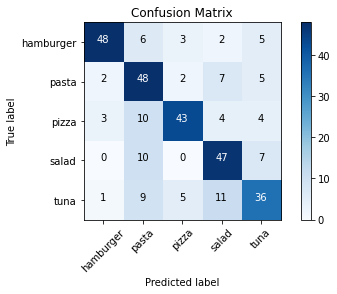

In [31]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = classes
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# orange movement (ignore this plix)

In [65]:
# Choosing a random image of a dog from disk. 
chosen_image = random.choice(os.listdir('train/pizza'))
print(chosen_image)

 pizza284.jpg


In [66]:
# image_path and set that to the relative location on disk of the chosen image.
image_path = 'train/pizza/' + chosen_image

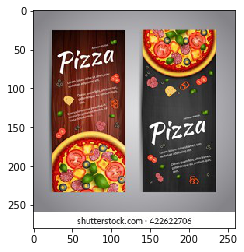

In [67]:
# Obtain image
# Expand the dimensions so that the image is compatible for how we'll use it later.
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])